In [1]:
import numpy as np
import matplotlib.pyplot as plt
from penrose import Penrose_gen
from BdG import BdG, make_H_kin, correlations, n_avg, fermi, occupation_number

# Generation of penrose tiling 

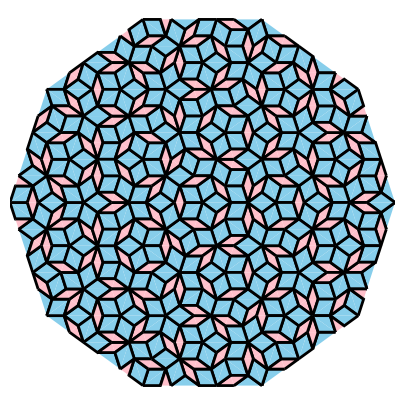

In [3]:
gen = 5

points, triangles = Penrose_gen(gen, plot_tiling = True) 
#points is a list of coordinates of tyles (x, y); 
#triangles is a list of triangles properties (color, a, b, c), where a, b, c are tuples of coordinates of triangle vertices

In [4]:
list_of_nbrs = []
ri = np.array(points)
N = ri.shape[0]
rij = np.array([[rii - rij for rii in ri] for rij in ri])
mrij = np.linalg.norm(rij, axis = -1)
mrij = np.round(mrij, 3)
a = np.unique(mrij)[2]
rij = rij / a
ri = ri / a
nbrs = list(zip(*np.where(mrij == np.unique(mrij)[2])))
list_of_nbrs = [[] for i in range(N)]

for pair in nbrs:
    i, j = pair
    list_of_nbrs[i].append(j)

# Setting constants

In [23]:
t = 1.0
g = 2.0 * t
mu = -2.0 * t
Ts = np.arange(0, 0.2, 0.01)
init_delta = np.ones(N)
M = make_H_kin(N, list_of_nbrs, t)

# Calculations

In [26]:
import pickle
import os

In [28]:
folder_name = f"gen={gen}"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [36]:
deltas = []
for T in Ts:
    file_name = f"gen={gen}/T={T}_g={g}_mu={mu}_nv={nv}"
    if os.path.exists(file_name):
        with open(file_name, "rb") as file:
            data = pickle.load(file)
            u, v, delta, E = data
            deltas.append(delta)

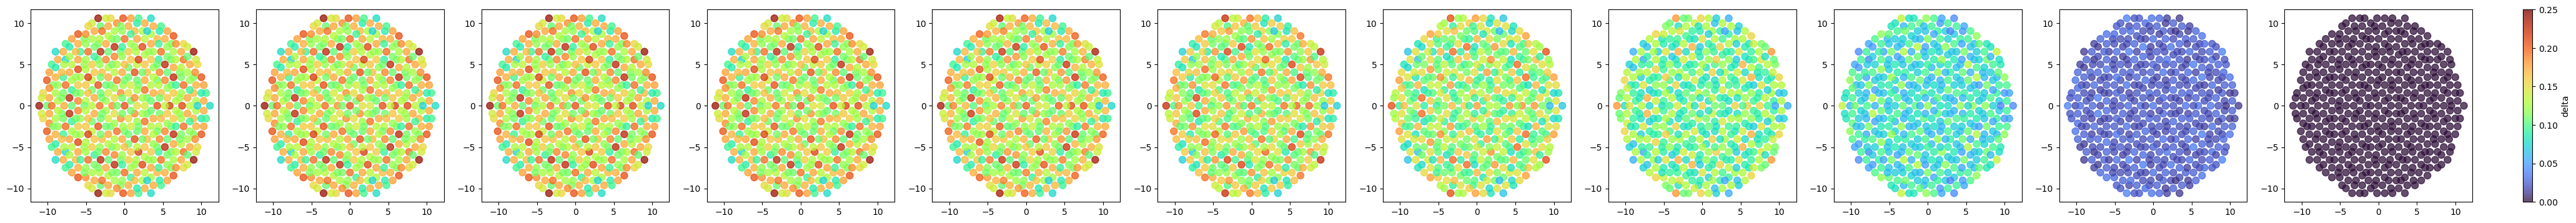

In [90]:
fig, ax = plt.subplots(1, 11, figsize = (52,4))
sc = []
for i, delta in enumerate(deltas):
    scatteri = ax[i].scatter(*ri.T, c=abs(delta), cmap = 'turbo', zorder = 1, s = 64, alpha = 0.75, vmin = 0, vmax=0.25)
    sc.append(scatteri)
    
cbar = fig.colorbar(scatteri, ax=ax, orientation='vertical', fraction=0.01, pad=0.02)
cbar.set_label('delta')

In [110]:
avg_deltas = []
for i, delta in enumerate(deltas):
    avg_deltas.append(round(abs(np.mean(delta)), 3))

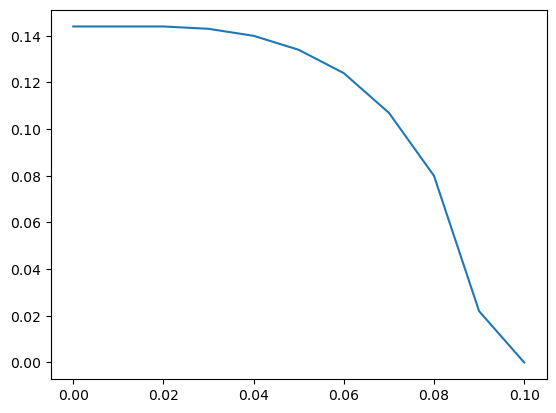

In [112]:
plt.plot(Ts[:11], avg_delta)